In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image=cv2.imread('training/usimages/car-03.png')

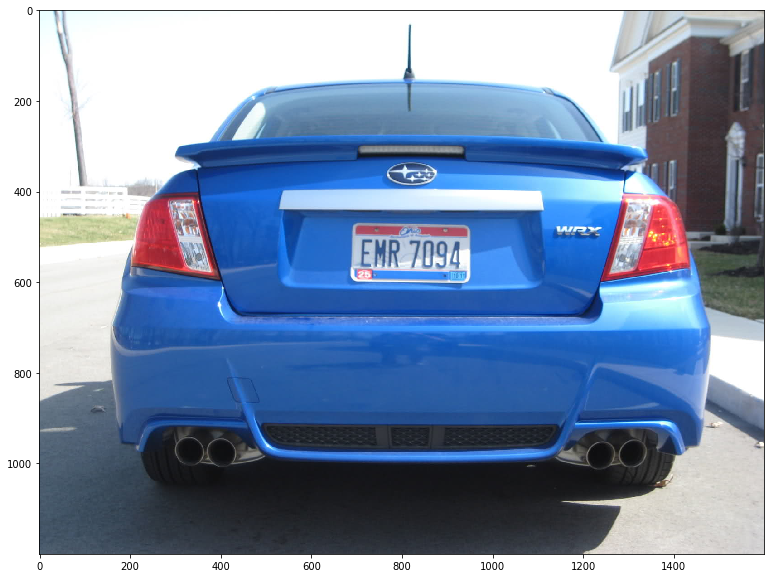

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
image = cv2.resize(image, (620,480))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grey scale

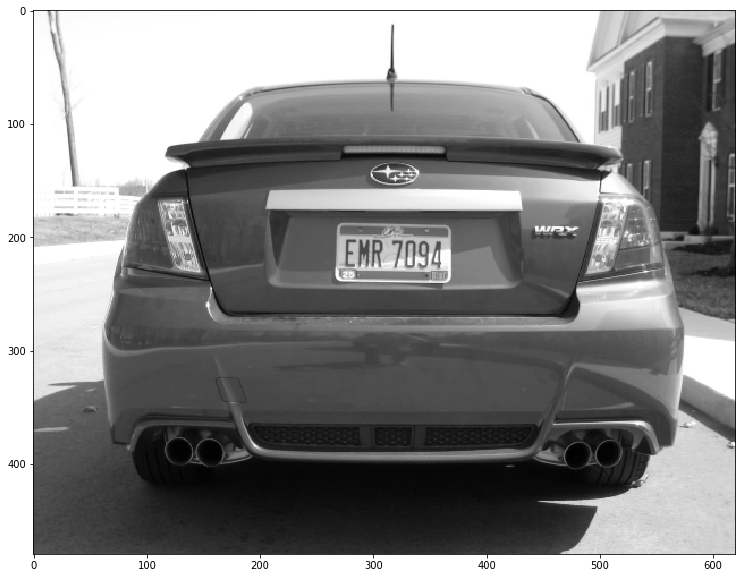

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(gray, cmap='gray')

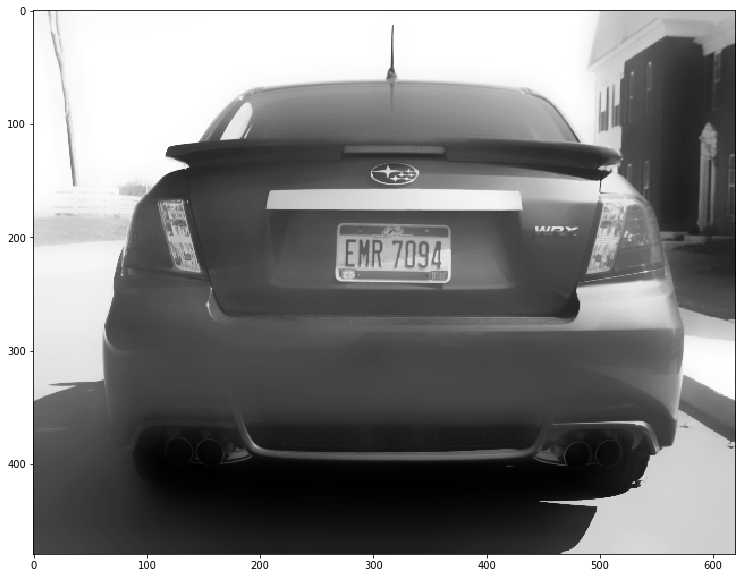

In [6]:
gray = cv2.bilateralFilter(gray, 40, 40, 40)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(gray, cmap='gray')

In [7]:
# Calculate best parameters for canny edges.
high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh

In [8]:
print(lowThresh, high_thresh)

77.0 154.0


In [9]:
edged = cv2.Canny(gray, lowThresh, high_thresh) #Perform Edge detection

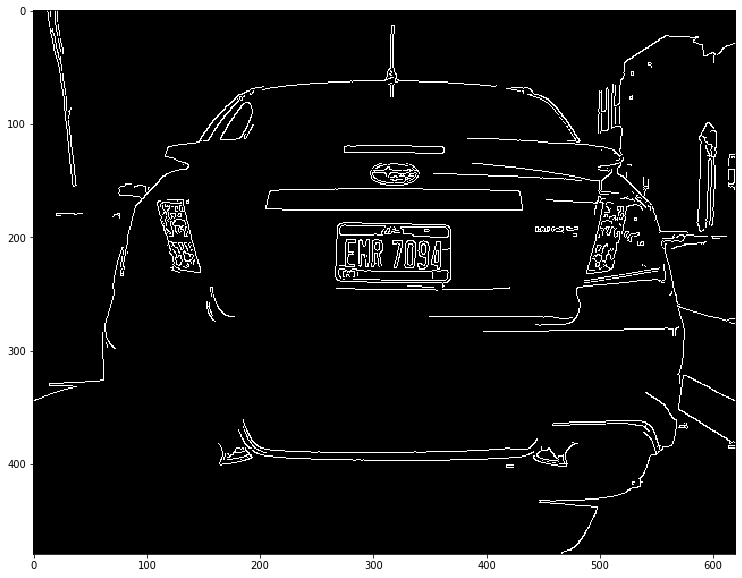

In [10]:
kernel = np.ones((20,20),np.uint8)
dilation = cv2.dilate(edged,kernel,iterations = 10)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(edged, cmap='gray')

In [11]:
_, contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
#import pprint
#pp = pprint.PrettyPrinter(indent=4)

candidates = []

for c in contours:
    if len(c) == 11:
        candidates.append(c)

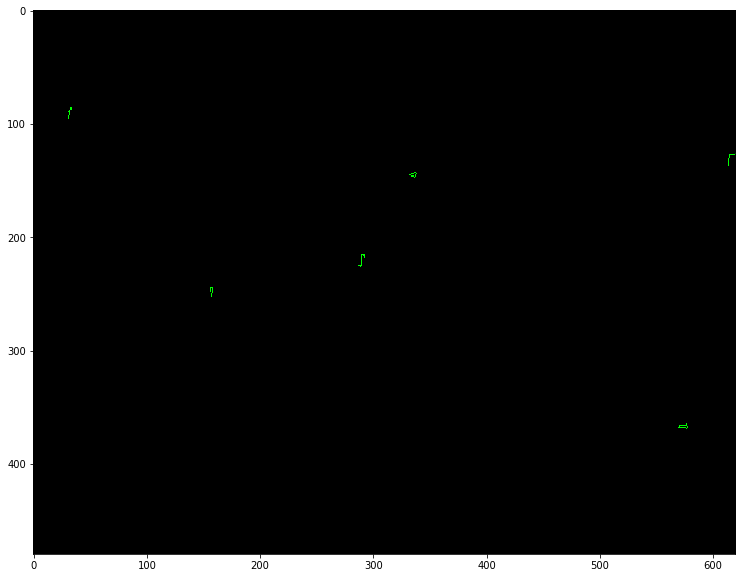

In [13]:
import numpy as np

canvas = np.zeros_like(image)
cv2.drawContours(canvas, candidates, -1, (0, 255, 0), 1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(canvas)